In [0]:
from keras.preprocessing.image import ImageDataGenerator
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import warnings
warnings.filterwarnings("ignore")

## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [2]:
from keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

4423680/4422102 [==============================] - 1s 0us/step


### Find no.of samples are there in training and test datasets

In [3]:
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


### Find dimensions of an image in the dataset

In [4]:
print('x_train shape:', x_train.shape)
print('x_train shape:', x_test.shape)

x_train shape: (60000, 28, 28, 1)
x_train shape: (10000, 28, 28, 1)


### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [0]:
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

### Normalize both the train and test image data from 0-255 to 0-1

In [0]:
x_train /= 255
x_test /= 255

### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [0]:
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1).astype('float32')
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1).astype('float32')

### Import the necessary layers from keras to build the model

In [0]:
model = Sequential()
model.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
early_stop = keras.callbacks.EarlyStopping(patience=5)

### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [16]:
model = Sequential()
model.add(Conv2D(32, 3, 3, input_shape=(28, 28, 1)))
model.add(Activation('relu'))
model.add(Conv2D(32, 3, 3))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(10))
model.add(Activation('softmax'))
early_stop = keras.callbacks.EarlyStopping(patience=5)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(x_train, y_train, nb_epoch=10,
              validation_data=(x_test, y_test), callbacks=[early_stop], verbose=True)

Train on 60000 samples, validate on 10000 samples
Epoch 1/10
60000/60000 [==============================] - 17s 288us/step - loss: 0.3973 - acc: 0.8580 - val_loss: 0.3071 - val_acc: 0.8874
Epoch 2/10
60000/60000 [==============================] - 17s 278us/step - loss: 0.2587 - acc: 0.9057 - val_loss: 0.2697 - val_acc: 0.9017
Epoch 3/10
60000/60000 [==============================] - 17s 275us/step - loss: 0.2103 - acc: 0.9232 - val_loss: 0.2330 - val_acc: 0.9123
Epoch 4/10
60000/60000 [==============================] - 17s 275us/step - loss: 0.1765 - acc: 0.9334 - val_loss: 0.2230 - val_acc: 0.9185
Epoch 5/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.1479 - acc: 0.9460 - val_loss: 0.2204 - val_acc: 0.9236
Epoch 6/10
60000/60000 [==============================] - 16s 274us/step - loss: 0.1255 - acc: 0.9531 - val_loss: 0.2362 - val_acc: 0.9215
Epoch 7/10
60000/60000 [==============================] - 16s 275us/step - loss: 0.1090 - acc: 0.9595 - val_loss: 0.

In [18]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_7 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
activation_13 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)             

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [0]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        zca_epsilon=1e-06,  # epsilon for ZCA whitening
        rotation_range=0,  # randomly rotate images in the range (degrees, 0 to 180)
        # randomly shift images horizontally (fraction of total width)
        width_shift_range=0.1,
        # randomly shift images vertically (fraction of total height)
        height_shift_range=0.1,
        shear_range=0.,  # set range for random shear
        zoom_range=0.,  # set range for random zoom
        channel_shift_range=0.,  # set range for random channel shifts
        # set mode for filling points outside the input boundaries
        fill_mode='nearest',
        cval=0.,  # value used for fill_mode = "constant"
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        # set rescaling factor (applied before any other transformation)
        rescale=None,
        # set function that will be applied on each input
        preprocessing_function=None,
        # image data format, either "channels_first" or "channels_last"
        data_format=None,
        # fraction of images reserved for validation (strictly between 0 and 1)
        validation_split=0.0)


datagen.fit(x_train)

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

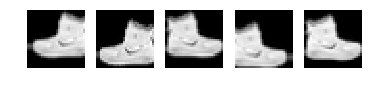

In [20]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [24]:
model.fit_generator(datagen.flow(x_train, y_train),
                        epochs=10,
                        validation_data=(x_test, y_test),
                        workers=4)                      

Epoch 1/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4429 - acc: 0.8360 - val_loss: 0.2388 - val_acc: 0.9164
Epoch 2/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3435 - acc: 0.8732 - val_loss: 0.2279 - val_acc: 0.9196
Epoch 3/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.3159 - acc: 0.8836 - val_loss: 0.2261 - val_acc: 0.9175
Epoch 4/10
1875/1875 [==============================] - 33s 17ms/step - loss: 0.2994 - acc: 0.8895 - val_loss: 0.2283 - val_acc: 0.9156
Epoch 5/10
1875/1875 [==============================] - 34s 18ms/step - loss: 0.2851 - acc: 0.8943 - val_loss: 0.2210 - val_acc: 0.9188
Epoch 6/10
1875/1875 [==============================] - 33s 18ms/step - loss: 0.2748 - acc: 0.8984 - val_loss: 0.2330 - val_acc: 0.9184
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2700 - acc: 0.9005 - val_loss: 0.2271 - val_acc: 0.9181
Epoch 8/10
1875/1875 [==========================

###  Report the final train and validation accuracy

In [26]:
Train_score = model.evaluate(x_train, y_train, verbose=1)
Test_score = model.evaluate(x_test, y_test, verbose=1)
print('Train loss:', Train_score[0])
print('Train accuracy:', Train_score[1])
print('Test loss:', Test_score[0])
print('Test accuracy:', Test_score[1])

10000/10000 [==============================] - 1s 78us/step
Train loss: 0.15644827325344085
Train accuracy: 0.9406333333333333
Test loss: 0.22709818298220635
Test accuracy: 0.9171


## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [0]:
from keras.datasets import cifar10

### **Load CIFAR10 dataset**

In [0]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [46]:
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [0]:
data_gen = ImageDataGenerator(
        rotation_range=15,  # randomly rotate images in the range (degrees, 0 to 180)
        width_shift_range=0.2,
        height_shift_range=0.2,
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False,  # randomly flip images
        )


### **Prepare/fit the generator.**

In [0]:
data_gen.fit(x_train)

### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

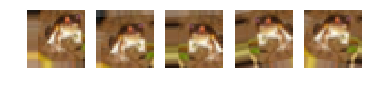

In [81]:
from matplotlib import pyplot as plt
import numpy as np
gen = data_gen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze().astype(np.uint8), cmap='gray')
    plt.plot()
plt.show()